# Is U.S. College Worth the Cost?

### Data Questions:

**This notebook utilizes the x dataset to answer the questions:**
* Question 1: What is the relationship between the level of student debt and the ownership of the university? (e.g., private, public).
* Question 2:  In which states students have the highest level of debt relative to household income?

### Overview
Over the past two decades, college tuition pricing has increased more than any other good or service in the US besides hospital services, outstripping average inflation by 3x. This has impacted the affordability of education and led to an increase in student debt load to record highs. These trends have also given rise to many fundamental questions such as: “Is college worth the cost?”. 

In this notebook we aim to provide data-driven insights into the current state of U.S. colleges by analyzing the cost of attendance as well as student’s financial debt and potential earnings after graduation.

### Resource Links

**GitHub repository:**  https://github.com/UC-Berkeley-I-School/Project2_Kenney_Rueda_Higgins
 
**Dataset:**  https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Institution_09012022.zip

**Source:**  U.S. College data by Institution: https://collegescorecard.ed.gov/data/

# Imports

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.pyplot import figure
import statistics

# Part A: Load the Data
Changes applied to dataset:
* Keep only variables of interest

In [248]:
college_df_raw = pd.read_csv('Most-Recent-Cohorts-Institution.csv', low_memory=False)

In [249]:
print(f"Number of Rows in Most-Recent-Cohorts-Institution.csv: {len(college_df_raw)}")
print("\nFirst 5 rows:")
college_df_raw.head()

Number of Rows in Most-Recent-Cohorts-Institution.csv: 6681

First 5 rows:


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,834.0,36639.0,0.6044,34076.0,35597.0,43145.0,40299.0,35424.0,36050.0,36377.0
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1233.0,49652.0,0.7472,42254.0,49817.0,51571.0,48182.0,46435.0,42007.0,56164.0
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,78.0,50355.0,0.6286,36636.0,44836.0,NaN,39040.0,NaN,32311.0,49599.0
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,891.0,57542.0,0.7769,49469.0,60533.0,57411.0,56884.0,53803.0,45170.0,66070.0
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1077.0,32797.0,0.5178,30634.0,34533.0,38216.0,30602.0,32364.0,29836.0,35315.0


### Keep only variables of interest

In [582]:
college_df = college_df_raw[['INSTNM', 'STABBR', 'CONTROL', 'COSTT4_A', 'COSTT4_P', 
                             'NPT4_PUB', 'NPT4_PRIV', 'MN_EARN_WNE_P10', 'DEBT_MDN', 
                             'GRAD_DEBT_MDN', 'MALE_DEBT_MDN', 'FEMALE_DEBT_MDN', 'MD_FAMINC', 
                             'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 
                             'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'CCUGPROF', 'MEDIAN_HH_INC', 'ST_FIPS']]
college_df.head()

,INSTNM,STABBR,CONTROL,COSTT4_A,COSTT4_P,NPT4_PUB,NPT4_PRIV,MN_EARN_WNE_P10,DEBT_MDN,GRAD_DEBT_MDN,...,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,CCUGPROF,MEDIAN_HH_INC,ST_FIPS
0,Alabama A & M University,AL,1,23445.0,NaN,15529.0,NaN,35500,15250,31000,...,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440,10.0,49720.22,1
1,University of Alabama at Birmingham,AL,1,25542.0,NaN,16530.0,NaN,48400,15085,22250,...,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059,9.0,55735.22,1
2,Amridge University,AL,2,20100.0,NaN,NaN,17618.0,47600,10984,31417,...,0.0268,0.0034,0.0000,0.0000,0.0000,0.0000,0.0235,5.0,53683.7,1
3,University of Alabama in Huntsville,AL,1,24861.0,NaN,17208.0,NaN,52000,14000,21450,...,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252,15.0,58688.62,1
4,Alabama State University,AL,1,21892.0,NaN,19534.0,NaN,30600,17500,31000,...,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111,10.0,46065.2,1


In [251]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INSTNM           6681 non-null   object 
 1   STABBR           6681 non-null   object 
 2   CONTROL          6681 non-null   int64  
 3   COSTT4_A         3320 non-null   float64
 4   COSTT4_P         2073 non-null   float64
 5   NPT4_PUB         1828 non-null   float64
 6   NPT4_PRIV        3565 non-null   float64
 7   MN_EARN_WNE_P10  5157 non-null   object 
 8   DEBT_MDN         6358 non-null   object 
 9   GRAD_DEBT_MDN    6358 non-null   object 
 10  MALE_DEBT_MDN    6358 non-null   object 
 11  FEMALE_DEBT_MDN  6358 non-null   object 
 12  MD_FAMINC        5891 non-null   object 
 13  UGDS_WHITE       5840 non-null   float64
 14  UGDS_BLACK       5840 non-null   float64
 15  UGDS_HISP        5840 non-null   float64
 16  UGDS_ASIAN       5840 non-null   float64
 17  UGDS_AIAN     

## Part B: Data Preparation
Changes applied to dataset:
* Combine average cost of attendance columns
* Combine average net price columns

### Combine average cost of attendence columns

In [265]:
# ignore setting with copy warning
pd.options.mode.chained_assignment = None  # default='warn'

In [266]:
college_df['COSTT4'] = college_df.COSTT4_A.combine_first(college_df.COSTT4_P)
college_df.drop(['COSTT4_A', 'COSTT4_P'], axis=1, inplace=True)
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INSTNM           6681 non-null   object 
 1   STABBR           6681 non-null   object 
 2   CONTROL          6681 non-null   int64  
 3   NPT4_PUB         1828 non-null   float64
 4   NPT4_PRIV        3565 non-null   float64
 5   MN_EARN_WNE_P10  5157 non-null   object 
 6   DEBT_MDN         6358 non-null   object 
 7   GRAD_DEBT_MDN    6358 non-null   object 
 8   MALE_DEBT_MDN    6358 non-null   object 
 9   FEMALE_DEBT_MDN  6358 non-null   object 
 10  MD_FAMINC        5891 non-null   object 
 11  UGDS_WHITE       5840 non-null   float64
 12  UGDS_BLACK       5840 non-null   float64
 13  UGDS_HISP        5840 non-null   float64
 14  UGDS_ASIAN       5840 non-null   float64
 15  UGDS_AIAN        5840 non-null   float64
 16  UGDS_NHPI        5840 non-null   float64
 17  UGDS_2MOR     

### Combine average net price columns

In [267]:
college_df['NPT4'] = college_df.NPT4_PUB.combine_first(college_df.NPT4_PRIV)
college_df.drop(['NPT4_PUB', 'NPT4_PRIV'], axis=1, inplace=True)
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INSTNM           6681 non-null   object 
 1   STABBR           6681 non-null   object 
 2   CONTROL          6681 non-null   int64  
 3   MN_EARN_WNE_P10  5157 non-null   object 
 4   DEBT_MDN         6358 non-null   object 
 5   GRAD_DEBT_MDN    6358 non-null   object 
 6   MALE_DEBT_MDN    6358 non-null   object 
 7   FEMALE_DEBT_MDN  6358 non-null   object 
 8   MD_FAMINC        5891 non-null   object 
 9   UGDS_WHITE       5840 non-null   float64
 10  UGDS_BLACK       5840 non-null   float64
 11  UGDS_HISP        5840 non-null   float64
 12  UGDS_ASIAN       5840 non-null   float64
 13  UGDS_AIAN        5840 non-null   float64
 14  UGDS_NHPI        5840 non-null   float64
 15  UGDS_2MOR        5840 non-null   float64
 16  UGDS_NRA         5840 non-null   float64
 17  UGDS_UNKN     

### percentage of null values per column


In [269]:
college_df.isnull().sum() * 100 / len(college_df)

INSTNM              0.000000
STABBR              0.000000
CONTROL             0.000000
MN_EARN_WNE_P10    22.810956
DEBT_MDN            4.834606
GRAD_DEBT_MDN       4.834606
MALE_DEBT_MDN       4.834606
FEMALE_DEBT_MDN     4.834606
MD_FAMINC          11.824577
UGDS_WHITE         12.587936
UGDS_BLACK         12.587936
UGDS_HISP          12.587936
UGDS_ASIAN         12.587936
UGDS_AIAN          12.587936
UGDS_NHPI          12.587936
UGDS_2MOR          12.587936
UGDS_NRA           12.587936
UGDS_UNKN          12.587936
COSTT4             19.278551
NPT4               19.278551
dtype: float64

# Part C: Data Questions

## Question 1: What is the relationship between the level of student debt and the ownership of the university?

#### Explore Debt Features
Outcomes:
* "PrivacySupressed" - dropped for this exercise
    * 14% for DEBT_MDN
    * 20% for GRAD_DEBT_MDN
    * 31% for gender debt medians
* MALE_DEBT_MDN and FEMALE_DEBT_MDN have the same distribution
    * not used for comparison
* GRAD_DEBT_MDN used for analysis because...

In [302]:
def print_top_value_counts(col, n=5):
    print(f"Top {n} value counts for {col}:")
    print(college_df[col].value_counts().nlargest(n))

In [303]:
def print_percent_privacy_suppressed(col):
    print("\nPrivacySuppressed Percentage: {:.2f}%".format((sum(college_df[col] == "PrivacySuppressed") / len(college_df))*100))

In [374]:
def explore_debt_var(col):
    print_top_value_counts(col)
    print_percent_privacy_suppressed(col)
    
    # NOTE: dropped all PrivacySuppressed
    tmp_df = college_df[college_df[col] != "PrivacySuppressed"].copy()
    
    # NOTE: Cast to a numeric column
    tmp_df[col] = pd.to_numeric(tmp_df[col])
    
    print("Percent Nulls: {:.2f}%".format((tmp_df[col].isna().sum()/len(tmp_df)*100)))
    print("Min Value: {:.0f}".format(min(tmp_df[col])))
    print("Max Value: {:.0f}".format(max(tmp_df[col])))
    print("Mean: {:.0f}".format(np.mean(tmp_df[col])))
    
    ax = tmp_df[col].hist()
    ax.set_title(f"{col}: Student Debt Freq Hist")
    ax.set_xlabel("Discrete Student Debt by Bin")
    ax.set_ylabel("Cumlative Debt in Bin")

##### Explore DEBT_MDN
The median original amount of the loan principal upon entering repayment (int)
* 14% of "PrivacySuppressed" Dropped

Top 5 value counts for DEBT_MDN:
PrivacySuppressed    936
9500                 478
5500                 271
6333                 174
12000                146
Name: DEBT_MDN, dtype: int64

PrivacySuppressed Percentage: 14.01%
Percent Nulls: 5.62%
Min Value: 1932
Max Value: 40824
Mean: 11221


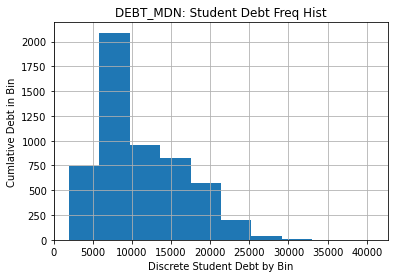

In [377]:
explore_debt_var('DEBT_MDN')

##### GRAD_DEBT_MDN 
The median debt for students who have completed (integer)
* 20% of "PrivacySupressed" Dropped

Top 5 value counts for GRAD_DEBT_MDN:
PrivacySuppressed    1325
9500                  313
27000                 215
25000                 140
6333                  138
Name: GRAD_DEBT_MDN, dtype: int64

PrivacySuppressed Percentage: 19.83%
Percent Nulls: 6.03%
Min Value: 2013
Max Value: 48148
Mean: 16095


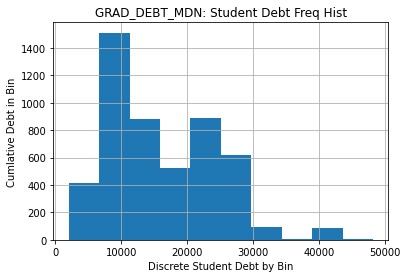

In [378]:
explore_debt_var('GRAD_DEBT_MDN')

##### MALE_DEBT_MDN 
The median debt for male students (integer)
* 31% "PrivacySuppressed"

Top 5 value counts for MALE_DEBT_MDN:
PrivacySuppressed    2051
5500                  369
9500                  368
12000                 109
19500                  91
Name: MALE_DEBT_MDN, dtype: int64

PrivacySuppressed Percentage: 30.70%
Percent Nulls: 6.98%
Min Value: 1913
Max Value: 31270
Mean: 11404


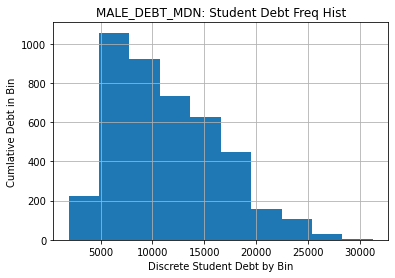

In [379]:
explore_debt_var('MALE_DEBT_MDN')

##### FEMALE_DEBT_MDN
The median debt for female students (integer)
* 31% "PrivacySuppressed"

Top 5 value counts for FEMALE_DEBT_MDN:
PrivacySuppressed    2051
9500                  392
5500                  141
15000                 125
19500                  96
Name: FEMALE_DEBT_MDN, dtype: int64

PrivacySuppressed Percentage: 30.70%
Percent Nulls: 6.98%
Min Value: 1855
Max Value: 35000
Mean: 12233


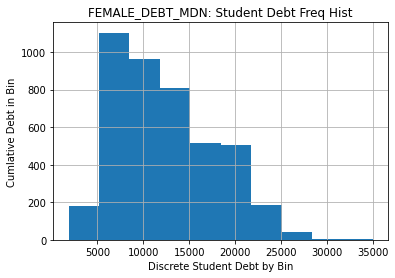

In [380]:
explore_debt_var('FEMALE_DEBT_MDN')

#### Explore the relationship between ownership and student debt

In [387]:
dbt_df = college_df.copy()

In [388]:
# NOTE: dropped all PrivacySuppressed
# NOTE: Cast to a numeric column
dbt_df = college_df.copy()
dbt_df = dbt_df[dbt_df.GRAD_DEBT_MDN != "PrivacySuppressed"]
dbt_df['GRAD_DEBT_MDN'] = pd.to_numeric(dbt_df['GRAD_DEBT_MDN'])

In [407]:
dbt_df.groupby(g, observed=True)['GRAD_DEBT_MDN'].agg(['count','sum'])

,count,sum
GRAD_DEBT_MDN,,
0-10K,1649,13114925.0
10-20K,1652,23525842.0
20-30K,1546,37681550.0
30-40K,98,3130820.0


In [410]:
bins = [0, 10001, 20001, 30001, 40001]
labels = ['0-10K', '10-20K', '20-30K', '30-40K+']

g = pd.cut(dbt_df['GRAD_DEBT_MDN'], 
           bins = bins, 
           labels = labels)
debt_sum_df = dbt_df.groupby(g, observed=True)['GRAD_DEBT_MDN'].agg(['count','sum']).reset_index()
debt_sum_df

,GRAD_DEBT_MDN,count,sum
0,0-10K,1649,13114925.0
1,10-20K,1652,23525842.0
2,20-30K,1546,37681550.0
3,30-40K+,98,3130820.0


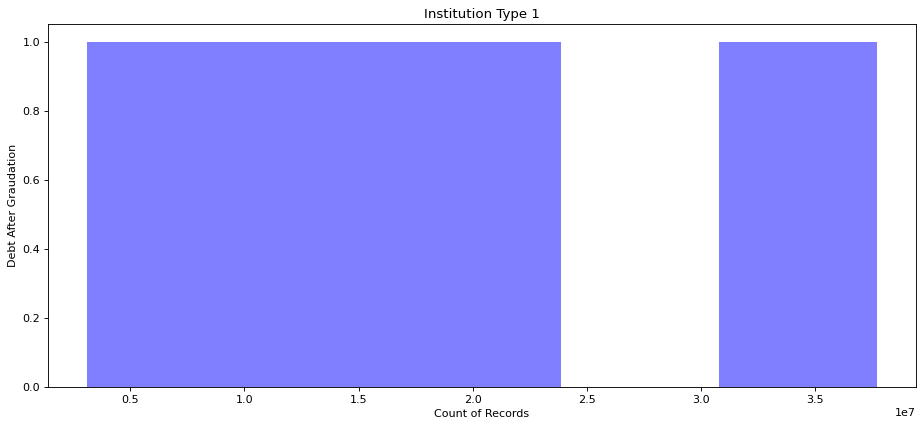

In [409]:
figure(figsize=(14, 6), dpi=80)

inst_key = 1

x = debt_sum_df['sum']
num_bins = len(bins)
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, weights='')

# plt.xticks(labels)

plt.ylabel('Debt After Graudation')
plt.xlabel('Count of Records');
plt.title(f"Institution Type {inst_key}")

plt.show()

#### Final Visual Code

In [800]:
# Rename control with the university type labels
control_dict = { 1: 'Public', 2:'Private non-profit', 3:'Private for-profit'}
college_df['CONTROL2'] = college_df['CONTROL'].apply(lambda x: control_dict[x])

# Classify universities by length of programs

'''
Legend as per Documentation:
-2 = NA
0 to 4 (both inclusive) = <2yrs 
5 to 15 = 4yrs
'''

bins = [-3, -1, 4, 15]
names = ['Not applicable', '<= 2yrs', '4yrs']

college_df['LENGTH'] = pd.cut(college_df['CCUGPROF'], bins, labels=names)

# Define classification function 
def custom_class(row):
    if (row['CONTROL2'] == 'Public') and (row['LENGTH'] == '<= 2yrs'):
        return "Public (<= 2yrs)"
    elif (row['CONTROL2'] == 'Public') and (row['LENGTH'] == '4yrs'):
        return "Public (4yrs)"
    elif (row['CONTROL2'] == 'Public'):
        return np.nan
    else:
        return row['CONTROL2']
    
# Create new column equal and apply function
college_df['CONTROL3'] = college_df['CONTROL']
college_df['CONTROL3'] = college_df.apply(custom_class, axis=1)

In [497]:
dbt_df['CONTROL2'].value_counts()

Private for-profit    2358
Public                1764
Private non-profit    1623
Name: CONTROL2, dtype: int64

In [496]:
college_df['CONTROL3'].value_counts()

Private for-profit    2604
Private non-profit    1996
Public (<= 2yrs)       887
Public (4yrs)          718
Name: CONTROL3, dtype: int64

In [498]:
# NOTE: dropped all PrivacySuppressed
# NOTE: Cast to a numeric column
col = 'DEBT_MDN'

dbt_df = college_df.copy()
dbt_df = dbt_df[dbt_df[col] != "PrivacySuppressed"]
dbt_df[col] = pd.to_numeric(dbt_df[col])

In [537]:
bins=np.linspace(start=0, stop=40000, num=9)

g = pd.cut(dbt_df['DEBT_MDN'], 
           bins = bins)
debt_sum_df = dbt_df.groupby(g, observed=True)['DEBT_MDN'].agg(['count','sum']).reset_index()
debt_sum_df

,DEBT_MDN,count,sum
0,"(0.0, 5000.0]",309,1284954.0
1,"(5000.0, 10000.0]",2635,20048463.0
2,"(10000.0, 15000.0]",1227,15707862.0
3,"(15000.0, 20000.0]",909,15974216.0
4,"(20000.0, 25000.0]",295,6530799.0
5,"(25000.0, 30000.0]",41,1098318.0
6,"(30000.0, 35000.0]",5,157145.0


In [550]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

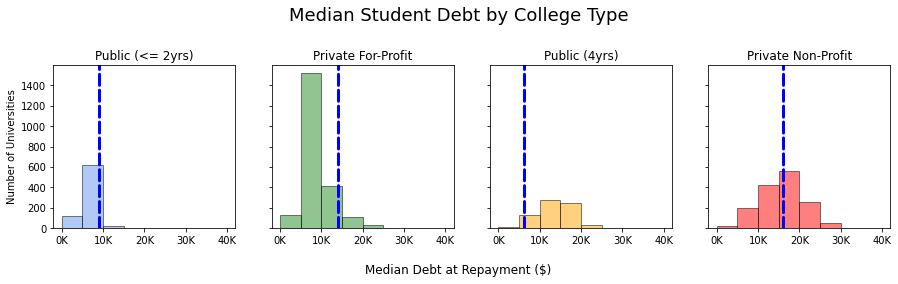

In [572]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,3), sharey=True)

a = dbt_df[dbt_df['CONTROL3'] == 'Public (<= 2yrs)']['DEBT_MDN']
b = dbt_df[dbt_df['CONTROL3'] == 'Private for-profit']['DEBT_MDN']
c = dbt_df[dbt_df['CONTROL3'] == 'Public (4yrs)']['DEBT_MDN']
d = dbt_df[dbt_df['CONTROL3'] == 'Private non-profit']['DEBT_MDN']

bins=np.linspace(start=0, stop=40000, num=9)

ax1.hist(a, bins, facecolor='cornflowerblue', edgecolor='black', alpha=0.5)
ax2.hist(b, bins, facecolor='forestgreen', edgecolor='black', alpha=0.5)
ax3.hist(c, bins, facecolor='orange', edgecolor='black', alpha=0.5)
ax4.hist(d, bins, facecolor='r', edgecolor='black', alpha=0.5)

fig.supxlabel('Median Debt at Repayment ($)', y=-0.1)
ax1.set_ylabel('Number of Universities')

ax1.set_title('Public (<= 2yrs)')
ax1.xaxis.set_major_formatter(FuncFormatter(thousands))
ax1.axvline(statistics.median(b.dropna()), color='b', linestyle='--', linewidth=3, dash_capstyle="round")

ax2.set_title('Private For-Profit')
ax2.xaxis.set_major_formatter(FuncFormatter(thousands))
ax2.axvline(statistics.median(c.dropna()), color='b', linestyle='--', linewidth=3, dash_capstyle="round")

ax3.set_title('Public (4yrs)')
ax3.xaxis.set_major_formatter(FuncFormatter(thousands))
ax3.axvline(statistics.median(a.dropna()), color='b', linestyle='--', linewidth=3, dash_capstyle="round")

ax4.set_title('Private Non-Profit')
ax4.xaxis.set_major_formatter(FuncFormatter(thousands))
ax4.axvline(statistics.median(d.dropna()), color='b', linestyle='--', linewidth=3, dash_capstyle="round")

fig.suptitle('Median Student Debt by College Type', fontsize=18, y = 1.15)

plt.show()

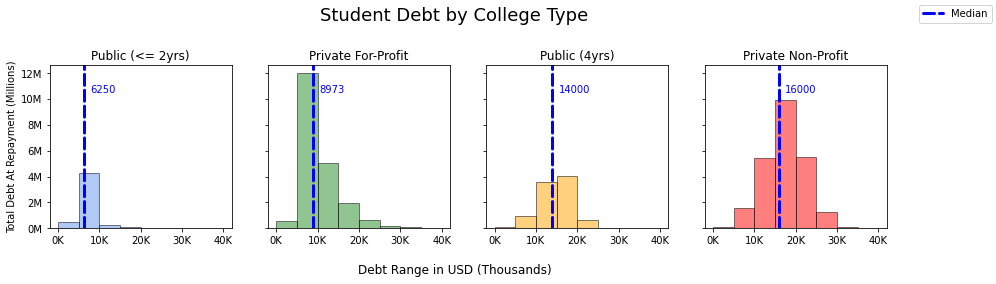

In [799]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,3), sharey=True)

a = dbt_df[dbt_df['CONTROL3'] == 'Public (<= 2yrs)']['DEBT_MDN']
b = dbt_df[dbt_df['CONTROL3'] == 'Private for-profit']['DEBT_MDN']
c = dbt_df[dbt_df['CONTROL3'] == 'Public (4yrs)']['DEBT_MDN']
d = dbt_df[dbt_df['CONTROL3'] == 'Private non-profit']['DEBT_MDN']

bins=np.linspace(start=0, stop=40000, num=9)

ax1.hist(a, bins, facecolor='cornflowerblue', edgecolor='black', alpha=0.5, weights=a)
ax2.hist(b, bins, facecolor='forestgreen', edgecolor='black', alpha=0.5, weights=b)
ax3.hist(c, bins, facecolor='orange', edgecolor='black', alpha=0.5, weights=c)
ax4.hist(d, bins, facecolor='r', edgecolor='black', alpha=0.5, weights=d)

fig.supxlabel('Debt Range in USD (Thousands)', y=-0.1)
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax1.set_ylabel('Total Debt At Repayment (Millions)')

ax1.set_title('Public (<= 2yrs)')
ax1.xaxis.set_major_formatter(FuncFormatter(thousands))
ax1.axvline(statistics.median(a.dropna()), color='b', linestyle='--', linewidth=3, dash_capstyle="round", label="Median")
ax1.text(statistics.median(a.dropna())+1500, 10500000, "{:.0f}".format(statistics.median(a.dropna())), color='b')

ax2.set_title('Private For-Profit')
ax2.xaxis.set_major_formatter(FuncFormatter(thousands))
ax2.axvline(statistics.median(b.dropna()), color='b', linestyle='--', linewidth=3, dash_capstyle="round")
ax2.text(statistics.median(b.dropna())+1500, 10500000, "{:.0f}".format(statistics.median(b.dropna())), color='b')

ax3.set_title('Public (4yrs)')
ax3.xaxis.set_major_formatter(FuncFormatter(thousands))
ax3.axvline(statistics.median(c.dropna()), color='b', linestyle='--', linewidth=3, dash_capstyle="round")
ax3.text(statistics.median(c.dropna())+1500, 10500000, "{:.0f}".format(statistics.median(c.dropna())), color='b')

ax4.set_title('Private Non-Profit')
ax4.xaxis.set_major_formatter(FuncFormatter(thousands))
ax4.axvline(statistics.median(d.dropna()), color='b', linestyle='--', linewidth=3, dash_capstyle="round")
ax4.text(statistics.median(d.dropna())+1500, 10500000, "{:.0f}".format(statistics.median(d.dropna())), color='b')

fig.suptitle('Student Debt by College Type', fontsize=18, y = 1.15)
fig.legend()

plt.show()

## Question 2: In which states students have the highest level of debt relative to household income?

#### Explore Household Income and State Features
Outcomes:


In [579]:
college_df['MEDIAN_HH_INC'].value_counts().nlargest(5)

PrivacySuppressed    85
55699.66             13
20501.04             11
19509.99             11
55670.96             11
Name: MEDIAN_HH_INC, dtype: int64

In [578]:
# NOTE: dropped all PrivacySuppressed
# NOTE: Cast to a numeric column
col = 'MEDIAN_HH_INC'

dbt_df2 = college_df.copy()
dbt_df2 = dbt_df2[dbt_df2[col] != "PrivacySuppressed"]
dbt_df2[col] = pd.to_numeric(dbt_df2[col])
dbt_df2[col].value_counts()

55699.66    13
55670.96    11
20501.04    11
19509.99    11
59572.48     8
            ..
83951.71     1
51707.55     1
68483.81     1
51940.24     1
58543.84     1
Name: MEDIAN_HH_INC, Length: 4079, dtype: int64

In [584]:
college_df['STABBR'].value_counts().nlargest(5)

CA    714
NY    450
TX    429
FL    395
PA    346
Name: STABBR, dtype: int64

#### Data Prep: Household Income to Debt Ratio

In [590]:
# NOTE: dropped all PrivacySuppressed
# NOTE: Cast to a numeric column
col = 'DEBT_MDN'

dbt_df2 = dbt_df2[dbt_df2[col] != "PrivacySuppressed"]
dbt_df2[col] = pd.to_numeric(dbt_df2[col])
dbt_df2[col].value_counts().nlargest(5)

9500.0     477
5500.0     271
6333.0     174
12000.0    146
19500.0    107
Name: DEBT_MDN, dtype: int64

In [597]:
dbt_df2['income_to_debt'] = dbt_df2['MEDIAN_HH_INC'] / dbt_df2['DEBT_MDN']

#### Explore states have the highest level of debt relative to household income

Text(0, 0.5, 'Count')

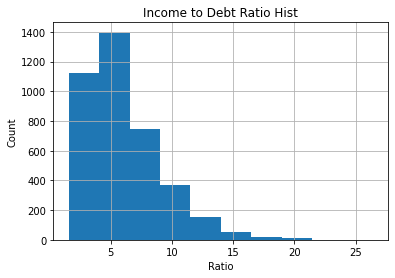

In [600]:
ax = dbt_df2['income_to_debt'].hist()
ax.set_title(f"Income to Debt Ratio Hist")
ax.set_xlabel("Ratio")
ax.set_ylabel("Count")

Text(0, 0.5, 'Total Income')

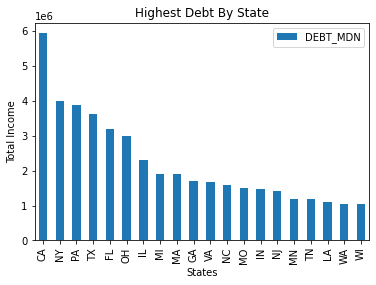

In [605]:
ax = dbt_df2[['DEBT_MDN', 'STABBR']].groupby('STABBR').sum().nlargest(20, 'DEBT_MDN').plot.bar()
ax.set_title(f"Highest Debt By State")
ax.set_xlabel("States")
ax.set_ylabel("Total Income")

Text(0, 0.5, 'Total Debt')

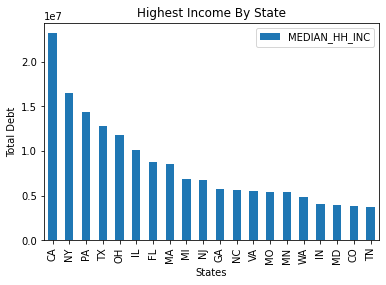

In [608]:
ax = dbt_df2[['MEDIAN_HH_INC', 'STABBR']].groupby('STABBR').sum().nlargest(20, 'MEDIAN_HH_INC').plot.bar()
ax.set_title(f"Highest Income By State")
ax.set_xlabel("States")
ax.set_ylabel("Total Debt")

Text(0, 0.5, 'Total Income to Debt Ratio')

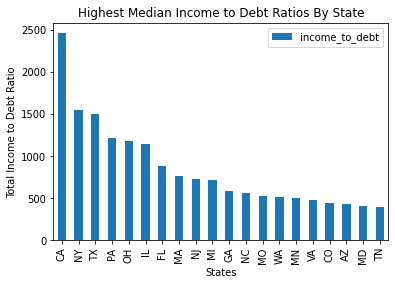

In [607]:
ax = dbt_df2[['income_to_debt', 'STABBR']].groupby('STABBR').sum().nlargest(20, 'income_to_debt').plot.bar()
ax.set_title(f"Highest Median Income to Debt Ratios By State")
ax.set_xlabel("States")
ax.set_ylabel("Total Income to Debt Ratio")

In [717]:
df2 = dbt_df2[['MEDIAN_HH_INC', 'STABBR']].groupby('STABBR').sum()
df3 = dbt_df2[['DEBT_MDN', 'STABBR']].groupby('STABBR').sum()
state_df = pd.merge(df2, df3, left_on='STABBR', right_on='STABBR', how='outer')
state_df['income_to_debt'] = state_df['MEDIAN_HH_INC'] / state_df['DEBT_MDN']
state_df = state_df.sort_values(['income_to_debt'], ascending=True) \
#    .rename(columns={'cand_nm':'Canidate Name', 'sum':'Donation Total', 'count': 'Donation Count', 'mean': 'Donation Average'})
state_df.head(7)

,MEDIAN_HH_INC,DEBT_MDN,income_to_debt
STABBR,,,
NV,972348.19,355135.0,2.737968
FL,8790024.84,3186469.0,2.758547
IN,4125689.42,1480028.0,2.787575
PR,1253201.77,449082.0,2.790586
AL,2555435.66,896509.0,2.850429
LA,3429649.61,1091880.0,3.141050
TN,3776461.81,1183145.0,3.191884


In [718]:
state_df = state_df.head(7)

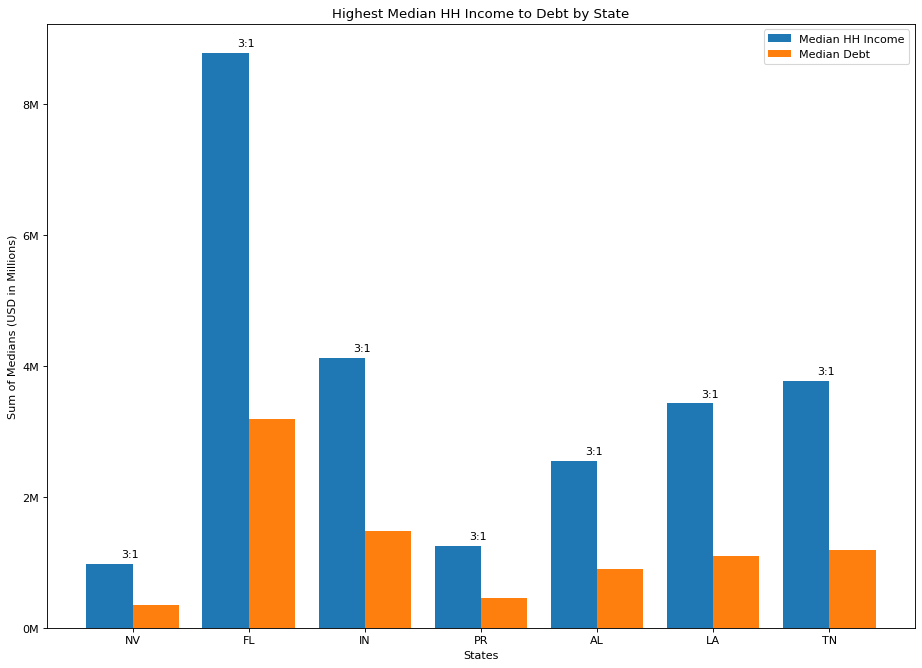

In [719]:
fig = figure(figsize=(14, 10), dpi=80)
ax = fig.add_subplot(111)

X = state_df.index
Yinc = state_df['MEDIAN_HH_INC']
Zdebt = state_df['DEBT_MDN']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yinc, 0.4, label = 'Median HH Income')
plt.bar(X_axis + 0.2, Zdebt, 0.4, label = 'Median Debt')

for i, state in enumerate(X):
    plt.text(i-0.1, Yinc[i]+100000, "{:.0f}:1".format(state_df.loc[state]['income_to_debt']))

plt.xticks(np.arange(len(X)), X)
ax.yaxis.set_major_formatter(FuncFormatter(millions))

plt.xlabel("States")
plt.ylabel("Sum of Medians (USD in Millions)")
plt.title("Lowest Median HH Income to Debt by State")
plt.legend()
plt.show()

In [744]:
df2 = dbt_df2[['MEDIAN_HH_INC', 'STABBR']].groupby('STABBR').sum()
df3 = dbt_df2[['DEBT_MDN', 'STABBR']].groupby('STABBR').sum()
state_df = pd.merge(df2, df3, left_on='STABBR', right_on='STABBR', how='outer')
state_df['debt_to_income_perc'] = (state_df['DEBT_MDN'] / state_df['MEDIAN_HH_INC']) * 100
state_df = state_df.sort_values(['debt_to_income_perc'], ascending=False) \
#    .rename(columns={'cand_nm':'Canidate Name', 'sum':'Donation Total', 'count': 'Donation Count', 'mean': 'Donation Average'})
state_df.head(7)

,MEDIAN_HH_INC,DEBT_MDN,debt_to_income_perc
STABBR,,,
NV,972348.19,355135.0,36.523439
FL,8790024.84,3186469.0,36.250967
IN,4125689.42,1480028.0,35.873471
PR,1253201.77,449082.0,35.834772
AL,2555435.66,896509.0,35.082433
LA,3429649.61,1091880.0,31.836488
TN,3776461.81,1183145.0,31.329458


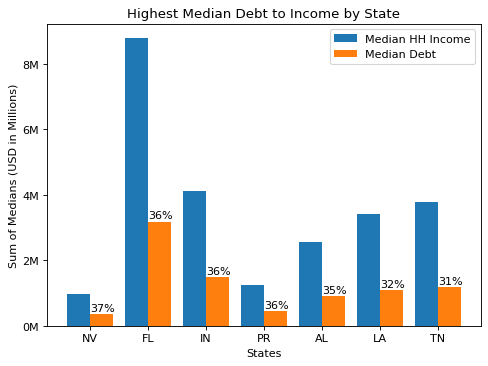

In [792]:
state_df = state_df.head(7)

fig = figure(figsize=(7, 5), dpi=80)
ax = fig.add_subplot(111)

X = state_df.index
Yinc = state_df['MEDIAN_HH_INC']
Zdebt = state_df['DEBT_MDN']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yinc, 0.4, label = 'Median HH Income')
plt.bar(X_axis + 0.2, Zdebt, 0.4, label = 'Median Debt')

for i, state in enumerate(X):
    plt.text(i+0.01, Zdebt[i]+100000, "{:.0f}%".format(state_df.loc[state]['debt_to_income_perc']))

plt.xticks(np.arange(len(X)), X)
ax.yaxis.set_major_formatter(FuncFormatter(millions))

plt.xlabel("States")
plt.ylabel("Sum of Medians (USD in Millions)")
plt.title("Highest Median Debt to Income by State")
plt.legend()
plt.show()